In [1]:

num1 = float(input("Enter the first number: "))
num2 = float(input("Enter the second number: "))
sum_result = num1 + num2
print("The sum of", num1, "and", num2, "is:", sum_result)


Enter the first number: 5
Enter the second number: 4
The sum of 5.0 and 4.0 is: 9.0


bfs

In [2]:
from collections import deque
def bfs(graph, start):

    queue = deque([start])
    # Track visited nodes
    visited = set([start])

    while queue:
        node = queue.popleft()
        print(node, end=" ")
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

bfs(graph, 'A')


A B C D E F 

dfs

In [3]:

def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()

    visited.add(node)
    print(node, end=" ")

    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


dfs(graph, 'A')


A B D E F C 

idfs

In [9]:

def dls(graph, node, target, depth, visited):

    if node == target:
        return True

    if depth <= 0:
        return False


    visited.add(node)


    for neighbor in graph[node]:
        if neighbor not in visited:
            if dls(graph, neighbor, target, depth - 1, visited):
                return True

    return False


def iddfs(graph, start, target, max_depth):
    for depth in range(max_depth + 1):
        visited = set()
        print(f"Exploring depth level {depth}")
        if dls(graph, start, target, depth, visited):
            print(f"Target {target} found at depth {depth}")
            return True
    print(f"Target {target} not found within depth {max_depth}")
    return False


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}


iddfs(graph, 'A', 'F', max_depth=3)


Exploring depth level 0
Exploring depth level 1
Exploring depth level 2
Target F found at depth 2


True

data visulaization

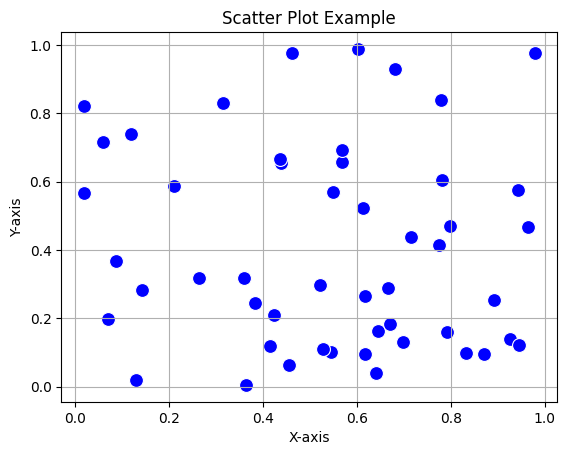

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)

sns.scatterplot(x=x, y=y, color='blue', s=100)
plt.title("Scatter Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


random movement

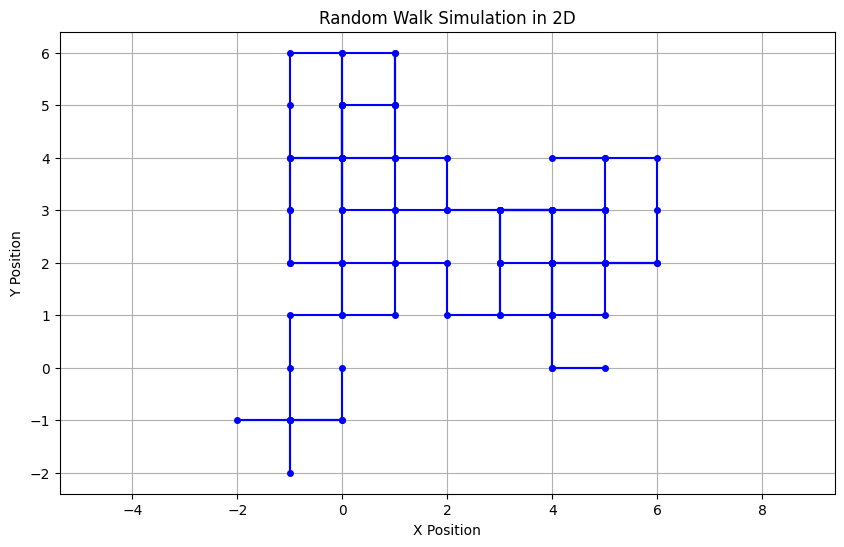

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def random_walk(num_steps):

    x, y = 0, 0
    x_positions = [x]
    y_positions = [y]

    for _ in range(num_steps):
        direction = np.random.choice(['up', 'down', 'left', 'right'])

        if direction == 'up':
            y += 1
        elif direction == 'down':
            y -= 1
        elif direction == 'left':
            x -= 1
        elif direction == 'right':
            x += 1


        x_positions.append(x)
        y_positions.append(y)

    return x_positions, y_positions


num_steps = 100


x_positions, y_positions = random_walk(num_steps)


plt.figure(figsize=(10, 6))
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='b', markersize=4)
plt.title("Random Walk Simulation in 2D")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.axis('equal')
plt.show()


A* algorithm

In [12]:
import heapq

class Node:
    def __init__(self, name, parent=None, g=0, h=0):
        self.name = name
        self.parent = parent
        self.g = g
        self.h = h
        self.f = g + h

    def __lt__(self, other):
        return self.f < other.f

def a_star_algorithm(start, goal, graph, heuristic):
    open_list = []
    closed_list = set()


    start_node = Node(start, None, 0, heuristic[start])
    heapq.heappush(open_list, start_node)

    while open_list:

        current_node = heapq.heappop(open_list)


        if current_node.name == goal:
            path = []
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.name)


        for neighbor, cost in graph[current_node.name].items():
            if neighbor in closed_list:
                continue

            g = current_node.g + cost
            h = heuristic[neighbor]
            neighbor_node = Node(neighbor, current_node, g, h)


            for open_node in open_list:
                if open_node.name == neighbor and g >= open_node.g:
                    break
            else:
                heapq.heappush(open_list, neighbor_node)

    return None


graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 1},
    'D': {'B': 2, 'G': 3},
    'E': {'B': 5, 'G': 2},
    'F': {'C': 1, 'G': 1},
    'G': {'D': 3, 'E': 2, 'F': 1}
}


heuristic = {
    'A': 7,
    'B': 6,
    'C': 2,
    'D': 1,
    'E': 2,
    'F': 0,
    'G': 0
}


path = a_star_algorithm('A', 'G', graph, heuristic)
print("Shortest path from A to G:", path)


Shortest path from A to G: ['A', 'C', 'F', 'G']


map coloring

In [14]:
def is_valid(graph, colors, node, color):
    """Check if the color assignment is valid for the node."""
    for neighbor in graph[node]:
        if colors[neighbor] == color:
            return False
    return True

def map_coloring_util(graph, colors, node, m):
    """Utilize backtracking to assign colors to the nodes."""

    if node == len(graph):
        return True


    for color in range(1, m + 1):
        if is_valid(graph, colors, node, color):
            colors[node] = color

            if map_coloring_util(graph, colors, node + 1, m):
                return True

            colors[node] = 0

    return False

def map_coloring(graph, m):
    """Main function to solve the map coloring problem."""
    colors = [0] * len(graph)
    if map_coloring_util(graph, colors, 0, m):
        return colors
    else:
        return None

graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}


m = 3


result = map_coloring(graph, m)

if result:
    print("Color assignment for the regions:", result)
else:
    print("No solution exists for the given number of colors.")


Color assignment for the regions: [1, 2, 3, 1]


NAIVE BAISE CLASSIFIER

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


data = {
    'text': [
        'I love programming',
        'Python is great for data science',
        'I enjoy learning new languages',
        'This is a spam message',
        'Free money available now!',
        'This is not a spam email'
    ],
    'label': ['positive', 'positive', 'positive', 'spam', 'spam', 'ham']
}


df = pd.DataFrame(data)


X = df['text']
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)


y_pred = classifier.predict(X_test_counts)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.0
     Actual Predicted
0  positive      spam
1  positive      spam


LINEAR REGRESSION

Mean Squared Error: 495132.2829964408
R^2 Score: 0.9990219609224762


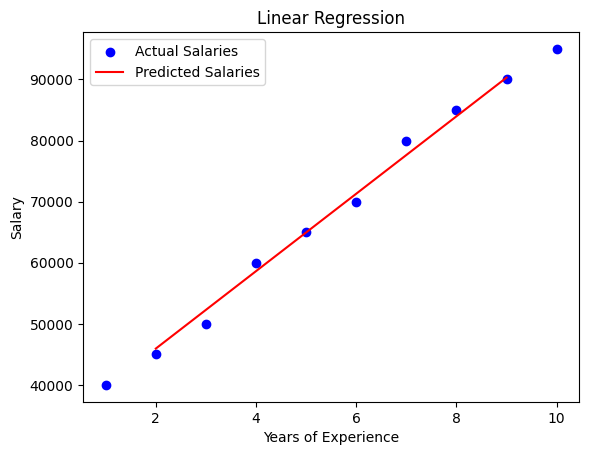

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


data = {
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [40000, 45000, 50000, 60000, 65000, 70000, 80000, 85000, 90000, 95000]
}


df = pd.DataFrame(data)


X = df[['YearsExperience']]
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


plt.scatter(X, y, color='blue', label='Actual Salaries')
plt.plot(X_test, y_pred, color='red', label='Predicted Salaries')
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


LOGISTIC REGRESSION

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


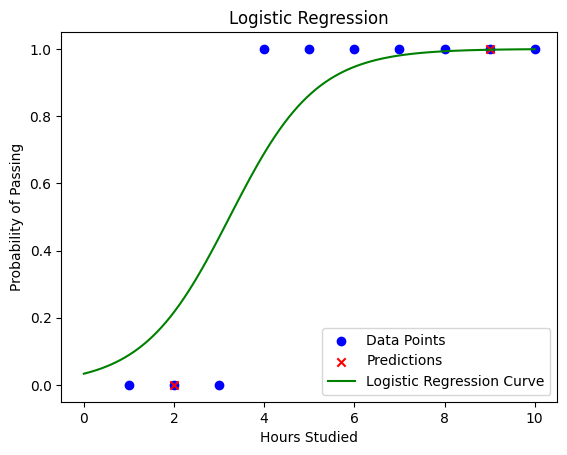

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data = {
    'HoursStudied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}


df = pd.DataFrame(data)

X = df[['HoursStudied']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)


plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred, color='red', label='Predictions', marker='x')
x_values = np.linspace(0, 10, 100).reshape(-1, 1)
plt.plot(x_values, model.predict_proba(x_values)[:, 1], color='green', label='Logistic Regression Curve')
plt.title('Logistic Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()


DECISION TREE

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



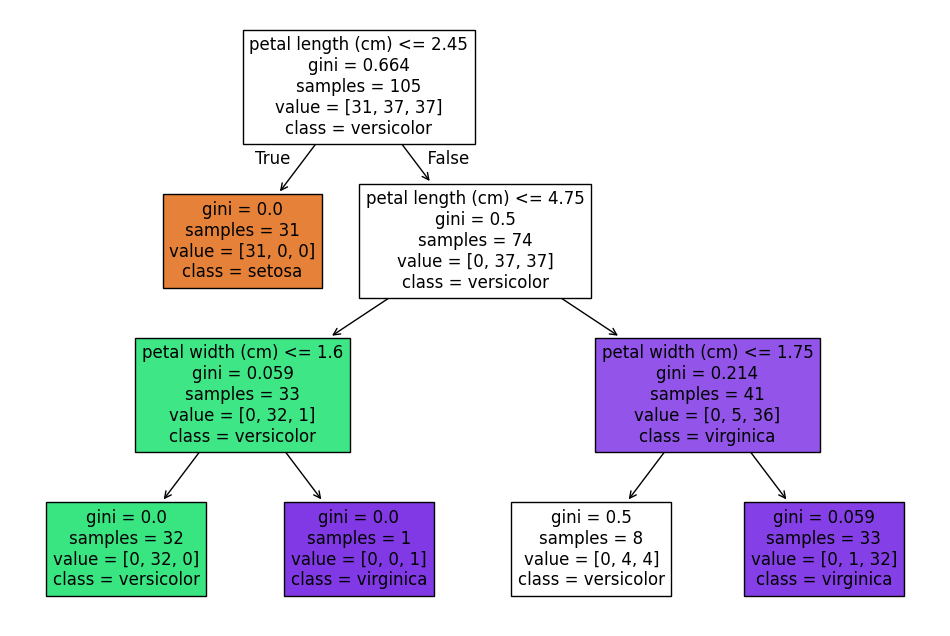

In [19]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

KNN

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


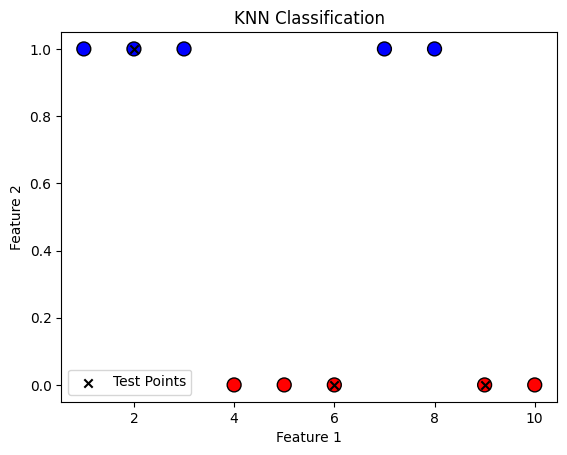

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    'Label': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B']
}


df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']]
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

plt.scatter(X['Feature1'], X['Feature2'], c=(y.map({'A': 0, 'B': 1})), cmap='bwr', edgecolor='k', s=100)
plt.scatter(X_test['Feature1'], X_test['Feature2'], color='black', marker='x', label='Test Points')
plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


K-MEANS

Silhouette Score: 0.6819938690643478


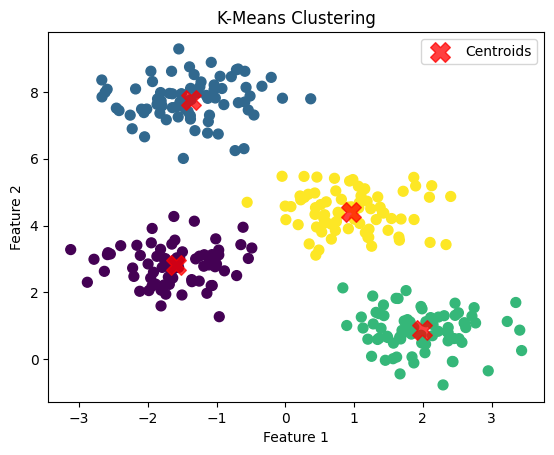

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics


X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])


k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)


y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_


silhouette_score = metrics.silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_score)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


PERCEPTION AND ANN

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1],
    'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa',
                'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
}


df = pd.DataFrame(data)


df['species'] = df['species'].astype('category').cat.codes


X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3167 - loss: 1.1450
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3833 - loss: 1.1255  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3167 - loss: 1.1487
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3833 - loss: 1.1004 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3167 - loss: 1.1058 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3167 - loss: 1.1008 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3833 - loss: 1.0673
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 1.0506 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4667 - loss: 1.1038 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4667 - loss: 1.0606 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 1.0978 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5333 - loss: 1.0656
